Elsa Ruelle et Anaïs Ferrera

Lien Github pour les fichiers csv : https://github.com/Elsa-R/ISOC731---CAC40

In [1]:
#pip install plotly==4.13.0

In [2]:
import pandas as pd
import plotly.graph_objects as go
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from pandas_datareader import data as wb
import math

In [3]:
cac40 = pd.read_csv('data_cac40.csv')

In [4]:
cac40

Date         Open         High          Low        Close  \
0     2014-12-01  4354.189941  4383.189941  4334.810059  4377.330078   
1     2014-12-02  4396.750000  4422.770020  4373.029785  4388.299805   
2     2014-12-03  4384.040039  4405.830078  4378.879883  4391.859863   
3     2014-12-04  4399.939941  4427.740234  4310.689941  4323.890137   
4     2014-12-05  4366.220215  4422.850098  4359.319824  4419.479980   
...          ...          ...          ...          ...          ...   
1528  2020-11-23  5543.830078  5555.830078  5492.149902  5492.149902   
1529  2020-11-24  5546.069824  5574.689941  5536.109863  5558.419922   
1530  2020-11-25  5577.970215  5589.779785  5545.009766  5571.290039   
1531  2020-11-26  5589.379883  5592.779785  5559.720215  5566.790039   
1532  2020-11-27  5563.040039  5612.759766  5556.620117  5598.180176   

        Adj Close       Volume  
0     4377.330078   95799400.0  
1     4388.299805  101308700.0  
2     4391.859863   87190000.0  
3     4323.890137  144554000.0  
4     4419.479980  125876600.0  
...           ...          ...  
1528  5492.149902   95986700.0  
1529  5558.419922          0.0  
1530  5571.290039          0.0  
1531  5566.790039   65753800.0  
1532  5598.180176   84633600.0  

[1533 rows x 7 columns]

# Description générale des données

### 1) 
Cours en ouverture :
Le cours d’ouverture est le premier cours affiché pour une valeur en début de séance.
il est issu de la comparaison des ordres d’achat et de vente, pour en extraire, au final, un cours d’équilibre approprié dans le cas d’un maximum d’échanges.
Le « cours d’ouverture » est donc le cours auquel le plus grand nombre d’actions vont pouvoir être échangées.

Cours en cloture :

Lorsque la Bourse ferme (17 h 30 à Paris), l'ensemble des ordres non exécutés permet de calculer le cours, ou fixing, de clôture.
Le lendemain, un cours est calculé par des ordinateurs, en fonction des ordres arrivés avant l'ouverture, pour déterminer le cours qui permettra le maximum de transactions au cours de la journée. C'est à partir de la fixation de ce cours d'ouverture, ou fixing d'ouverture, que les échanges peuvent commencer.

Maxima :

Valeur la plus haute du jour.

Minima :

Valeur la plus basse du jour.

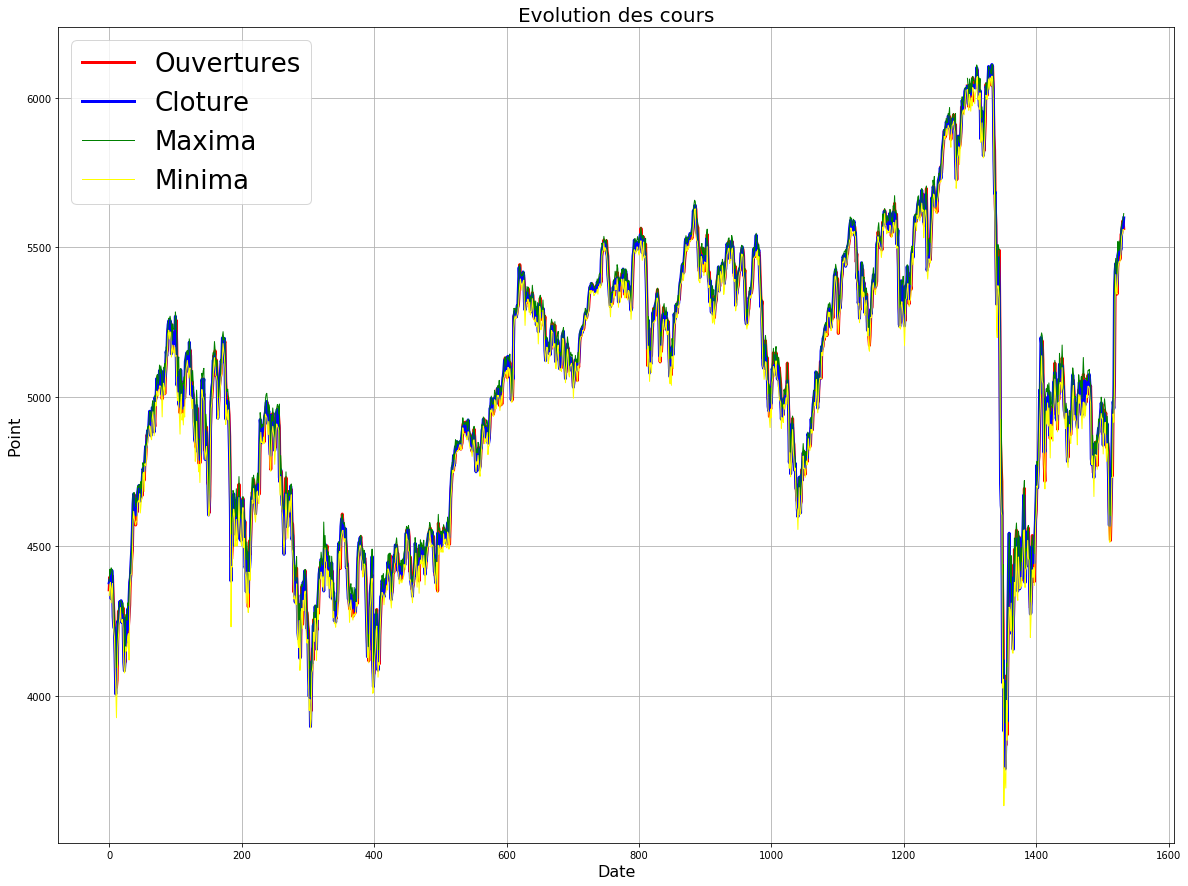

In [5]:
plt.figure(figsize=(20,15))

plt.plot(cac40.index, cac40['Open'], color='red', linewidth=3, markersize=10, label = "Ouvertures")
plt.plot(cac40.index, cac40['Close'], color='blue', linewidth=3, markersize=10, label = "Cloture")
plt.plot(cac40.index, cac40['High'], color='green', linewidth=1, markersize=10, label = "Maxima")
plt.plot(cac40.index, cac40['Low'], color='yellow', linewidth=1, markersize=10, label = "Minima")

plt.xlabel('Date', fontsize=16)
plt.ylabel('Point', fontsize=16)
plt.legend(fontsize=26)
plt.grid(True)
plt.title('Evolution des cours', fontsize=20)
plt.show()

Le cours d'ouverture correspond à la première cotation de la journée, celle-ci est faite à partir des ordres collectés dans le carnet d'ordre à 9H00.

Le cours de fermeture (ou fixing) est lui déterminé selon l'état du carnet d'ordre à 17H35 le soir. Il est donc normal que ces cours puissent être différents, l'état du carnet d'ordre de la valeur entre 17H36 et 9H00 pouvant changer considérablement.

### 2)

In [6]:
fig = go.Figure(data=[go.Candlestick(x=cac40.index,
                open=cac40['Open'],
                high=cac40['High'],
                low=cac40['Low'],
                close=cac40['Close'])])
fig.show()

On observe qu'en mars 2020, il y a de grandes bougies rouges qui correspondent à une baisse du cac40 due à la crise sanitaire.

### 3)

In [7]:
bitcoin = pd.read_csv('BTC-USD.csv')

In [8]:
fig = go.Figure(data=[go.Candlestick(x=bitcoin['Date'],
                open=bitcoin['Open'],
                high=bitcoin['High'],
                low=bitcoin['Low'],
                close=bitcoin['Close'])])
fig.show()

### 4)

#### Rendement logarithmique et arithmétique pour le cac40 au jour

In [9]:
listeRtcac40 = []
num = 0
for i in cac40['Open'] :
    if num == 0 :
        num = i
    else :
        rt = math.log(i/(num))
        num = i 
        listeRtcac40.append(rt)


In [10]:
listePtcac40 = []
num = 0
for i in cac40['Open'] :
    if num == 0 :
        num = i
    else :
        pt = (i-num)/(num)
        num = i 
        listePtcac40.append(pt)

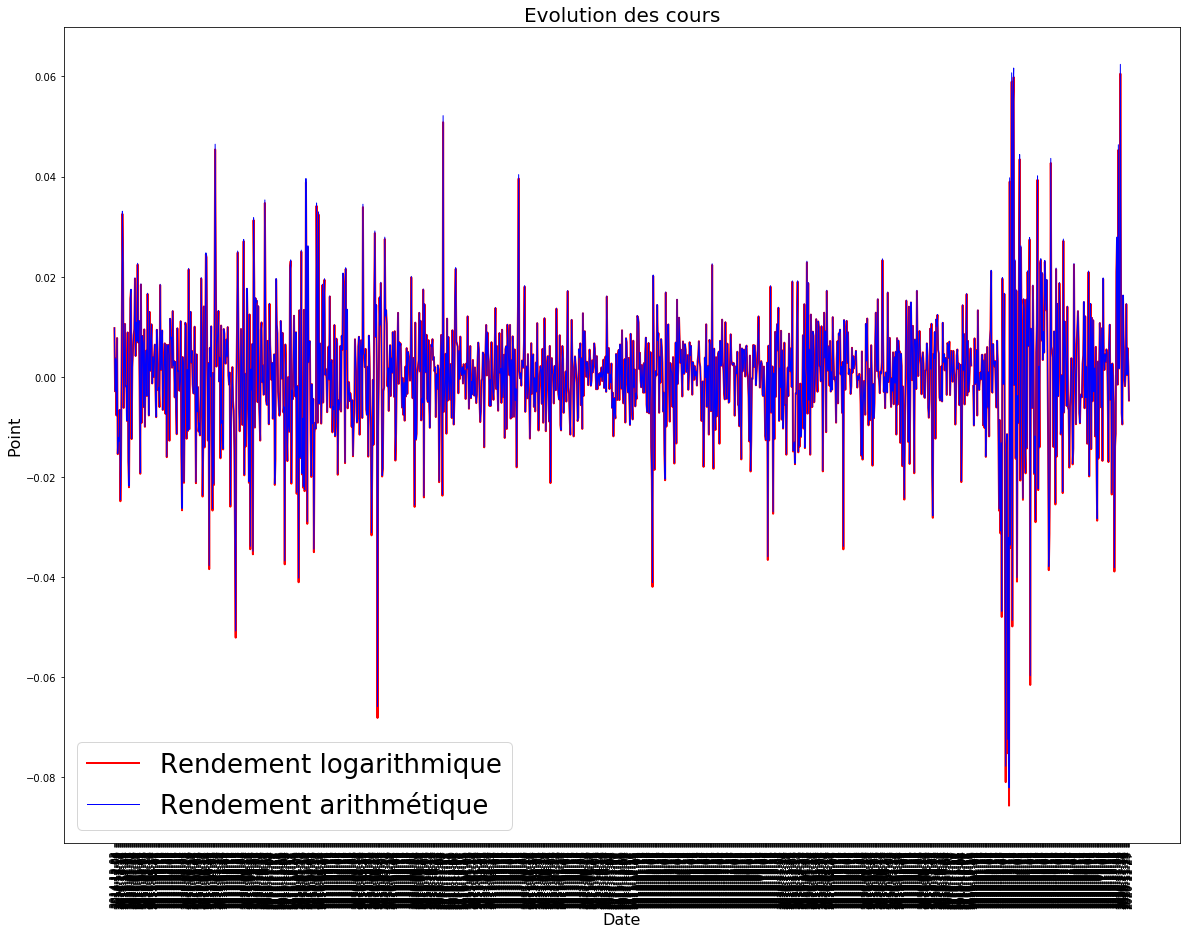

In [31]:
plt.figure(figsize=(20,15))

plt.plot(cac40['Date'][1:], listeRtcac40, color='red', linewidth=2, markersize=10, label = "Rendement logarithmique")
plt.plot(cac40['Date'][1:], listePtcac40, color='blue', linewidth=1, markersize=10, label = "Rendement arithmétique")

plt.xticks(rotation=90)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Point', fontsize=16)
plt.legend(fontsize=26)
plt.title('Evolution des cours', fontsize=20)
plt.show()

#### Rendement logarithmique et arithmétique pour le cac40 au mois

In [12]:
cac40Mois = pd.read_csv('FCHI_mois.csv')
listeRtcac40Mois = []
num = 0
for i in cac40Mois['Open'] :
    if num == 0 :
        num = i
    else :
        rt = math.log(i/(num))
        num = i 
        listeRtcac40Mois.append(rt)

In [13]:
listePtMois = []
num = 0
for i in cac40Mois['Open'] :
    if num == 0 :
        num = i
    else :
        pt = (i-num)/(num)
        num = i 
        listePtMois.append(pt)

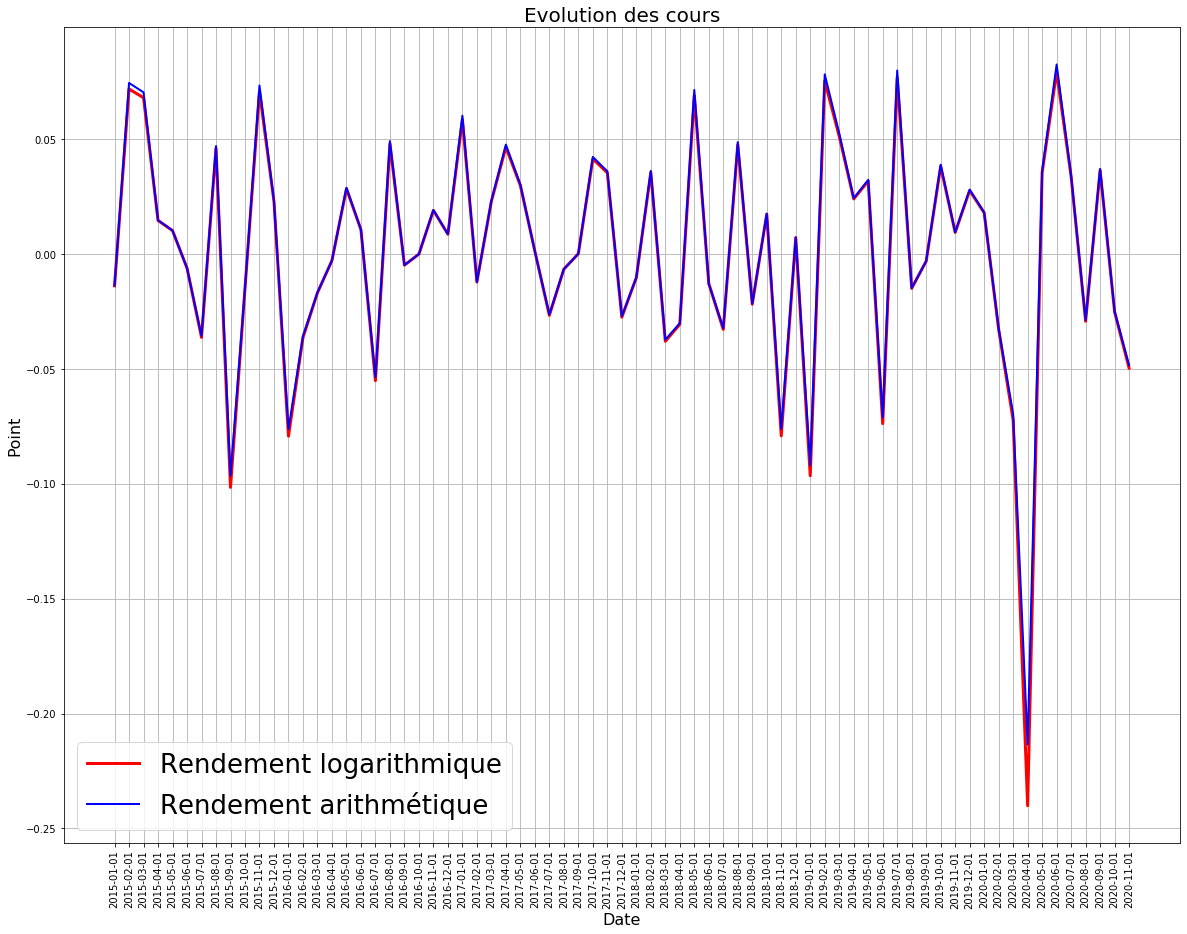

In [14]:
plt.figure(figsize=(20,15))

plt.plot(cac40Mois['Date'][1:], listeRtcac40Mois, color='red', linewidth=3, markersize=10, label = "Rendement logarithmique")
plt.plot(cac40Mois['Date'][1:], listePtMois, color='blue', linewidth=2, markersize=10, label = "Rendement arithmétique")

plt.xticks(rotation=90)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Point', fontsize=16)
plt.legend(fontsize=26)
plt.grid(True)
plt.title('Evolution des cours', fontsize=20)
plt.show()

#### Rendement logarithmique et arithmétique pour le cac40 à l'année

In [15]:
cac40An = pd.read_csv('FCHI_an.csv')
listeRtcac40An = []
num = 0
for i in cac40An['Open'] :
    if num == 0 :
        num = i
    else :
        rt = math.log(i/(num))
        num = i 
        listeRtcac40An.append(rt)

In [16]:
listePtAn = []
num = 0
for i in cac40An['Open'] :
    if num == 0 :
        num = i
    else :
        pt = (i-num)/(num)
        num = i 
        listePtAn.append(pt)

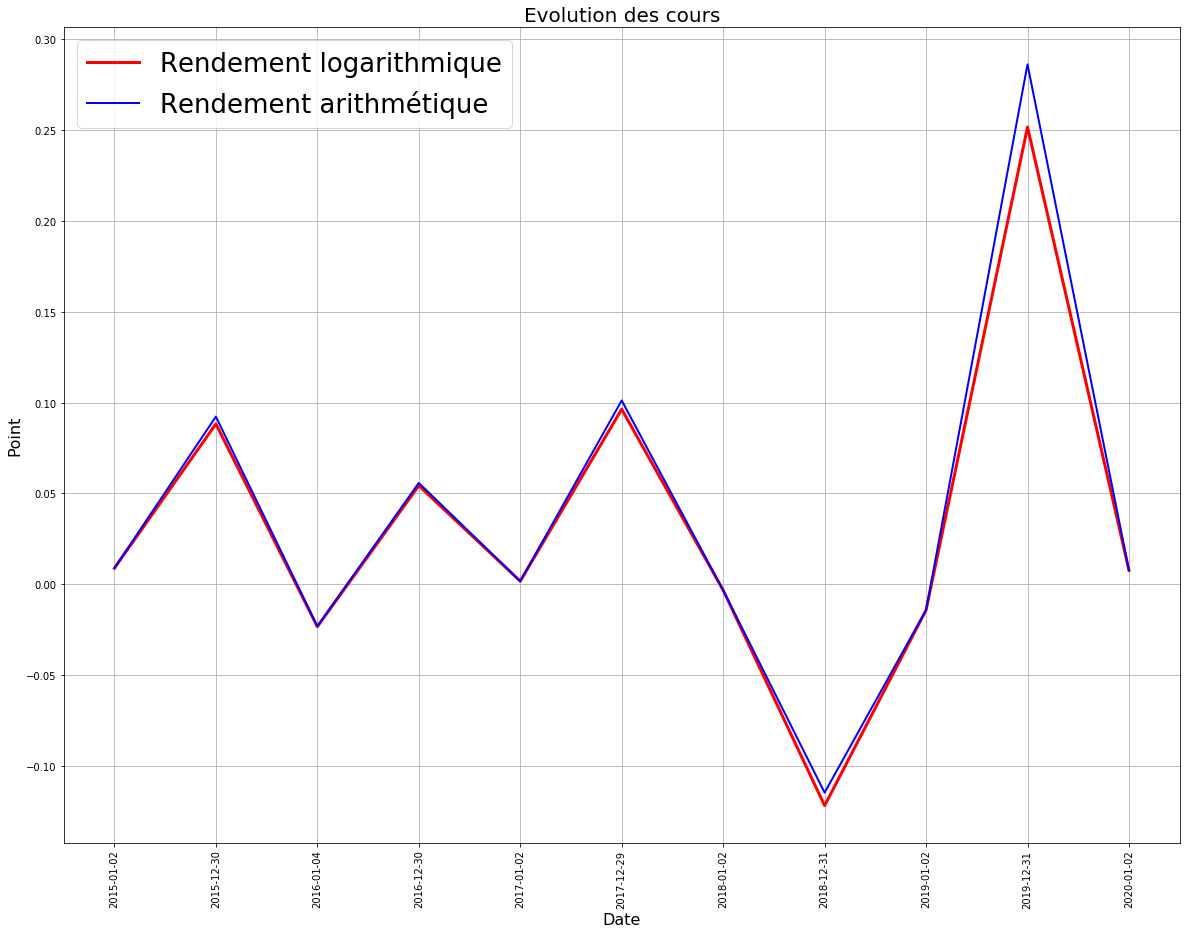

In [17]:
plt.figure(figsize=(20,15))

plt.plot(cac40An['Date'][1:], listeRtcac40An, color='red', linewidth=3, markersize=10, label = "Rendement logarithmique")
plt.plot(cac40An['Date'][1:], listePtAn, color='blue', linewidth=2, markersize=10, label = "Rendement arithmétique")

plt.xticks(rotation=90)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Point', fontsize=16)
plt.legend(fontsize=26)
plt.grid(True)
plt.title('Evolution des cours', fontsize=20)
plt.show()

#### Rendement logarithmique et arithmétique pour le bitcoin au jour

In [18]:
listeRtBitcoin = []
num = 0
for i in bitcoin['Open'] :
    if num == 0 :
        num = i
    else :
        rt = math.log(i/(num))
        num = i 
        listeRtBitcoin.append(rt)

In [19]:
listePtBitcoin = []
num = 0
for i in bitcoin['Open'] :
    if num == 0 :
        num = i
    else :
        pt = (i-num)/(num)
        num = i 
        listePtBitcoin.append(pt)

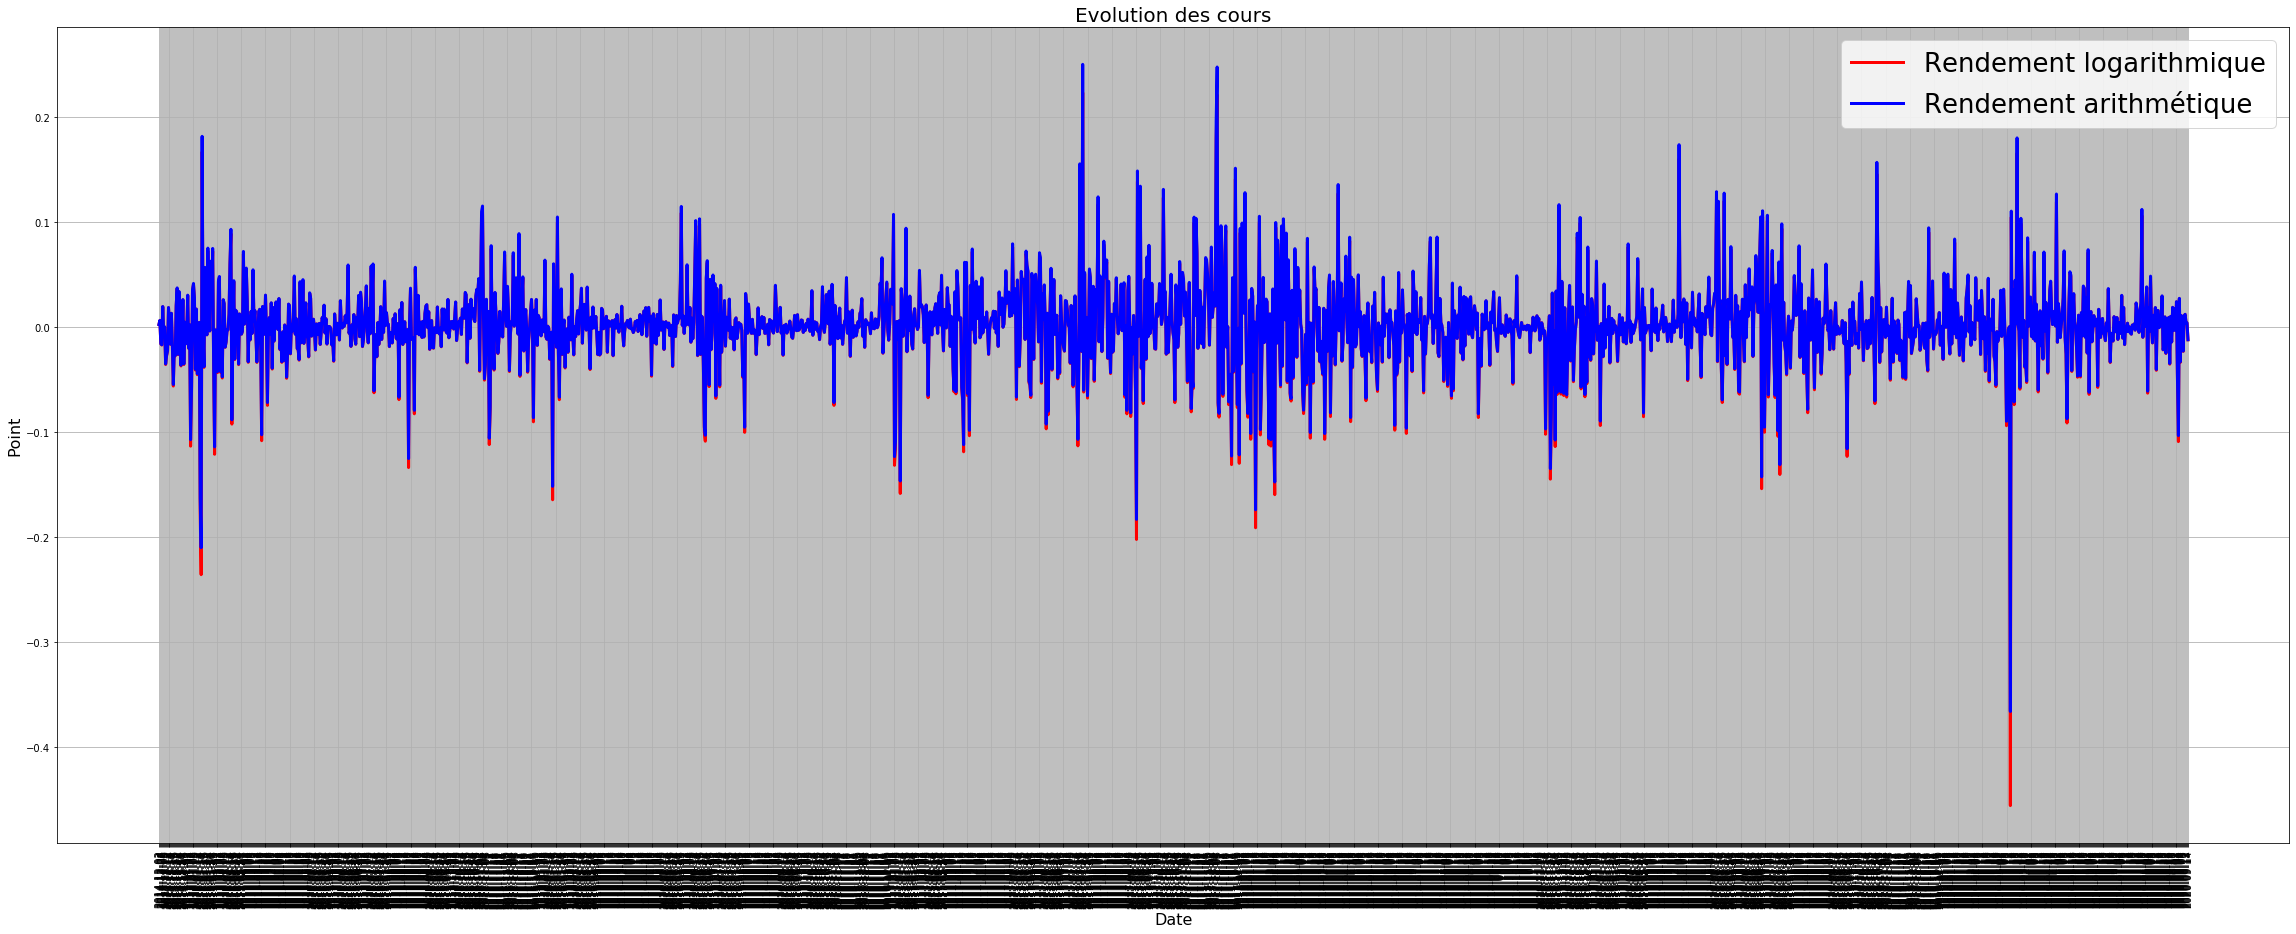

In [20]:
plt.figure(figsize=(40,15))

plt.plot(bitcoin['Date'][1:], listeRtBitcoin, color='red', linewidth=3, markersize=10, label = "Rendement logarithmique")
plt.plot(bitcoin['Date'][1:], listePtBitcoin, color='blue', linewidth=3, markersize=10, label = "Rendement arithmétique")

plt.xticks(rotation=90)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Point', fontsize=16)
plt.legend(fontsize=26)
plt.grid(True)
plt.title('Evolution des cours', fontsize=20)
plt.show()

#### Rendement logarithmique et arithmétique pour le bitcoin au mois

In [21]:
bitcoinMois = pd.read_csv('BTC-USD_mois.csv')
listeRtBitcoinMois = []
num = 0
for i in bitcoinMois['Open'] :
    if num == 0 :
        num = i
    else :
        rt = math.log(i/(num))
        num = i 
        listeRtBitcoinMois.append(rt)

In [22]:
listePtBitcoinMois = []
num = 0
for i in bitcoinMois['Open'] :
    if num == 0 :
        num = i
    else :
        pt = (i-num)/(num)
        num = i 
        listePtBitcoinMois.append(pt)

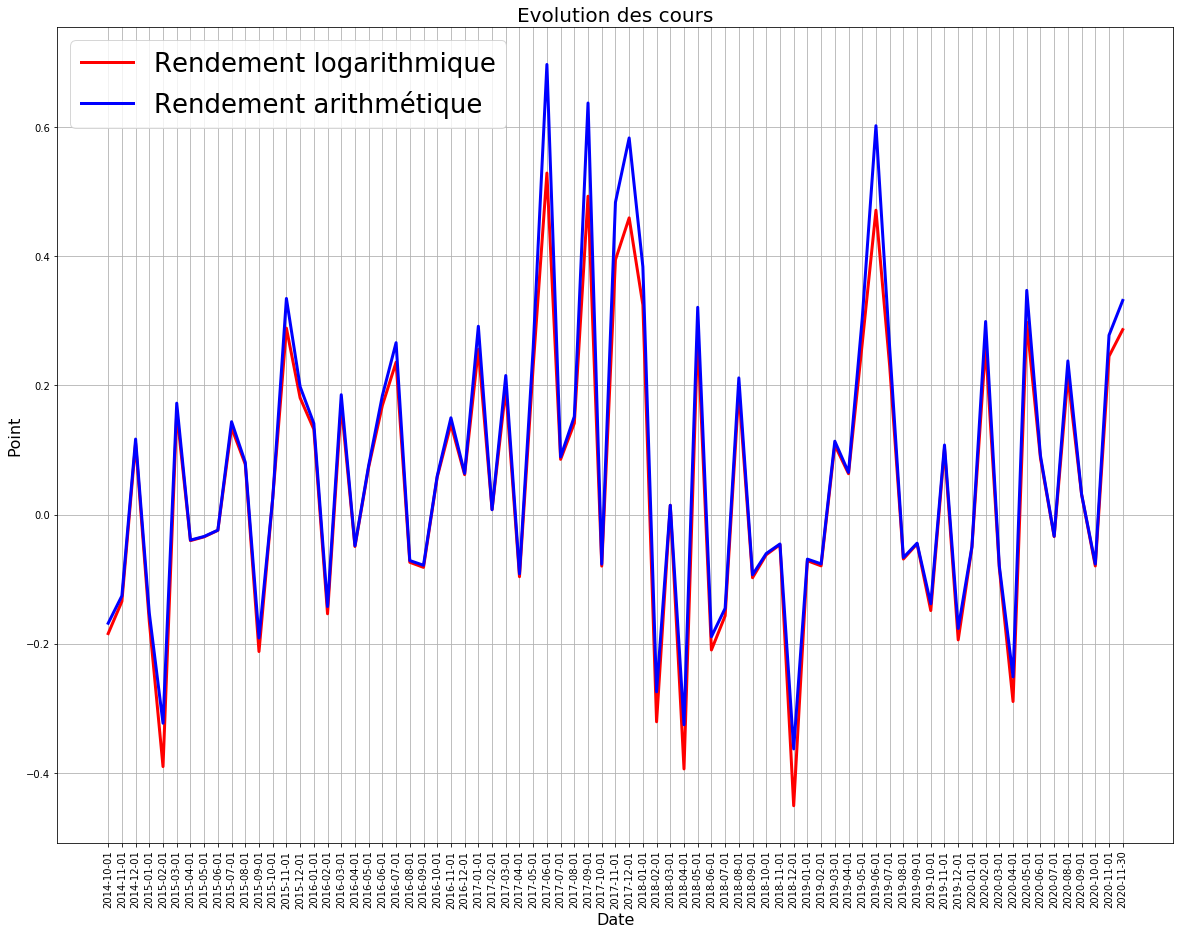

In [23]:
plt.figure(figsize=(20,15))

plt.plot(bitcoinMois['Date'][1:], listeRtBitcoinMois, color='red', linewidth=3, markersize=10, label = "Rendement logarithmique")
plt.plot(bitcoinMois['Date'][1:], listePtBitcoinMois, color='blue', linewidth=3, markersize=10, label = "Rendement arithmétique")

plt.xticks(rotation=90)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Point', fontsize=16)
plt.legend(fontsize=26)
plt.grid(True)
plt.title('Evolution des cours', fontsize=20)
plt.show()

#### Rendement logarithmique et arithmétique pour le bitcoin à l'année

In [24]:
bitcoinAn = pd.read_csv('BTC-USD_an.csv')
listeRtBitcoinAn = []
num = 0
for i in bitcoinAn['Open'] :
    if num == 0 :
        num = i
    else :
        rt = math.log(i/(num))
        num = i 
        listeRtBitcoinAn.append(rt)

In [25]:
listePtBitcoinAn = []
num = 0
for i in bitcoinAn['Open'] :
    if num == 0 :
        num = i
    else :
        pt = (i-num)/(num)
        num = i 
        listePtBitcoinAn.append(pt)

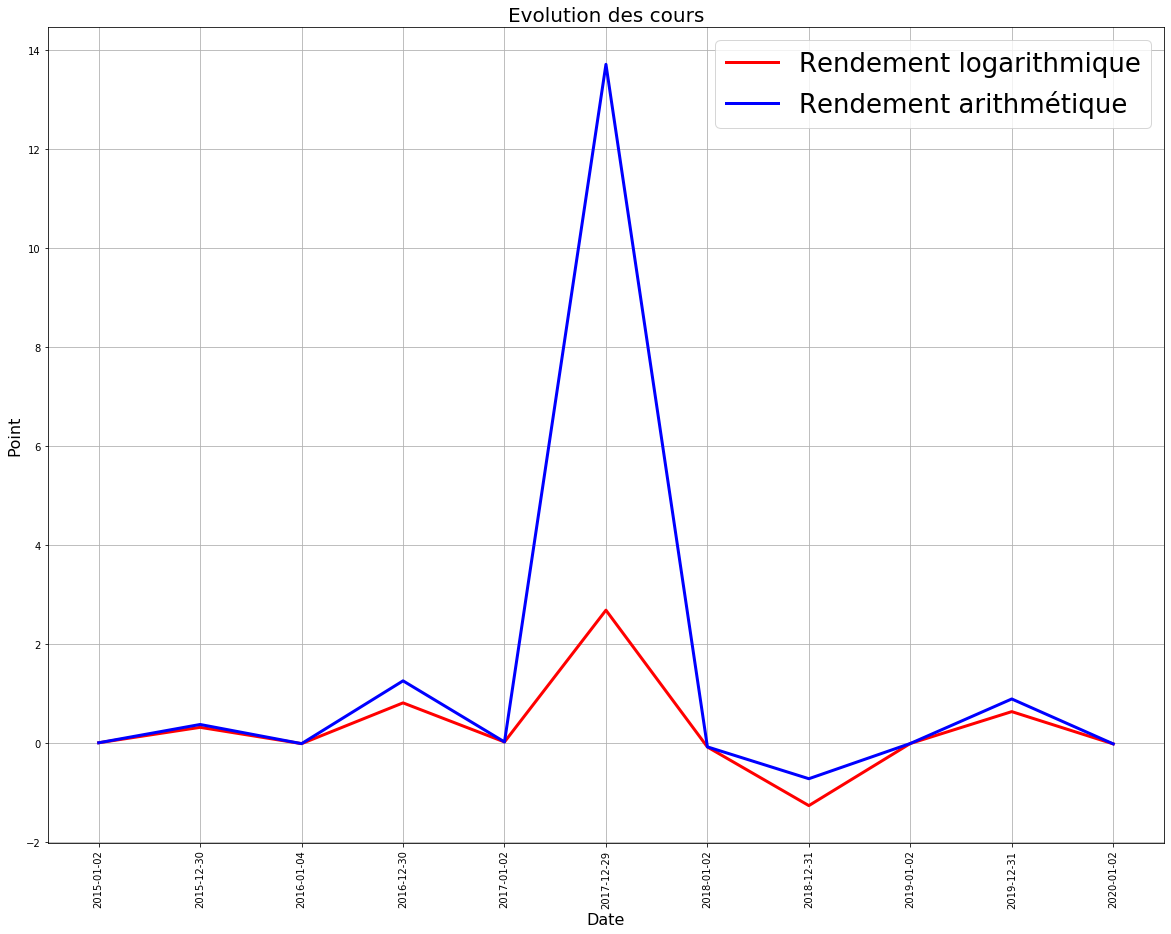

In [26]:
plt.figure(figsize=(20,15))

plt.plot(bitcoinAn['Date'][1:], listeRtBitcoinAn, color='red', linewidth=3, markersize=10, label = "Rendement logarithmique")
plt.plot(bitcoinAn['Date'][1:], listePtBitcoinAn, color='blue', linewidth=3, markersize=10, label = "Rendement arithmétique")

plt.xticks(rotation=90)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Point', fontsize=16)
plt.legend(fontsize=26)
plt.grid(True)
plt.title('Evolution des cours', fontsize=20)
plt.show()

# Graphique temporel des rendements du cac40 et du Bitcoin au mois

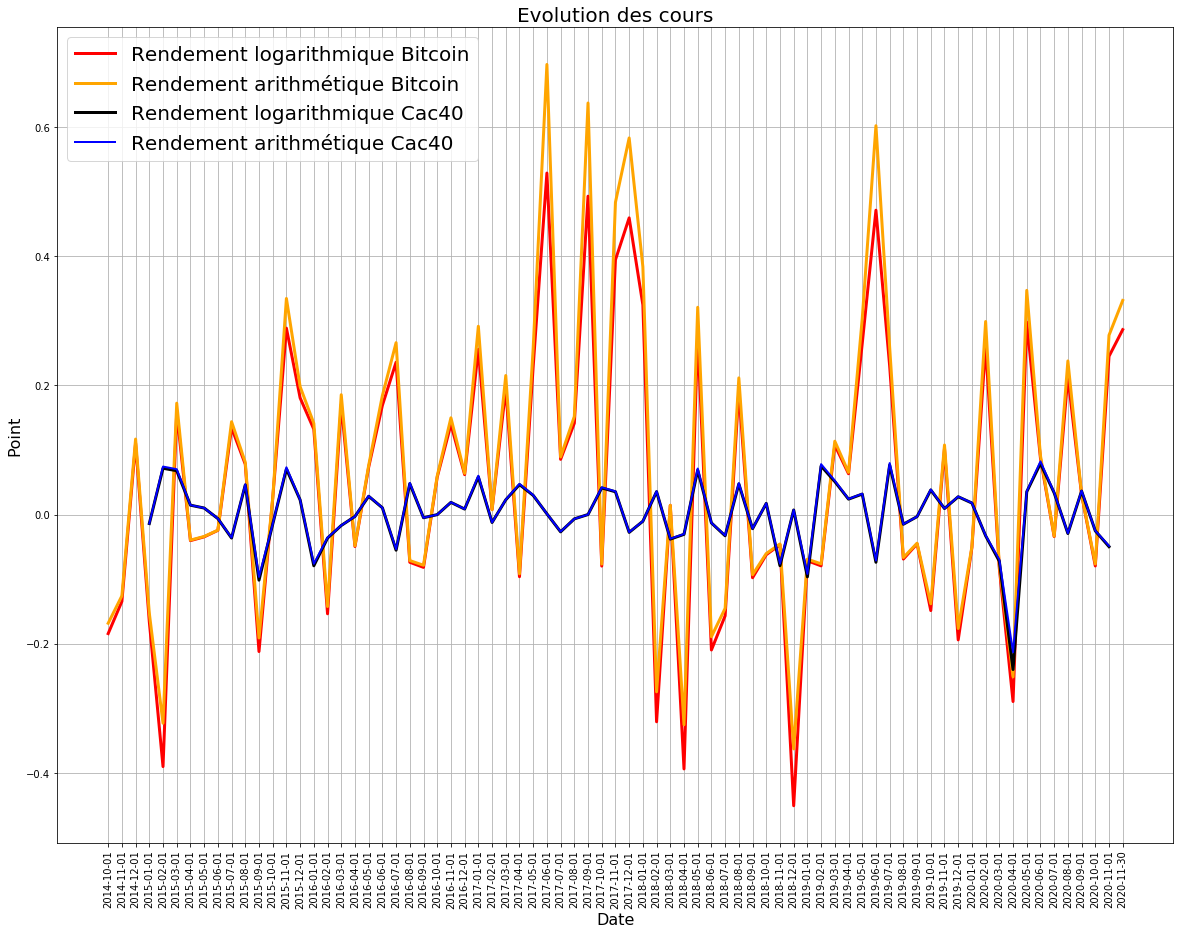

In [27]:
plt.figure(figsize=(20,15))

plt.plot(bitcoinMois['Date'][1:], listeRtBitcoinMois, color='red', linewidth=3, markersize=10, label = "Rendement logarithmique Bitcoin")
plt.plot(bitcoinMois['Date'][1:], listePtBitcoinMois, color='orange', linewidth=3, markersize=10, label = "Rendement arithmétique Bitcoin")
plt.plot(cac40Mois['Date'][1:], listeRtcac40Mois, color='black', linewidth=3, markersize=10, label = "Rendement logarithmique Cac40")
plt.plot(cac40Mois['Date'][1:], listePtMois, color='blue', linewidth=2, markersize=10, label = "Rendement arithmétique Cac40")

plt.xticks(rotation=90)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Point', fontsize=16)
plt.legend(fontsize=20)
plt.grid(True)
plt.title('Evolution des cours', fontsize=20)
plt.show()

# Graphique temporel des rendements du cac40 et du Bitcoin à l'année

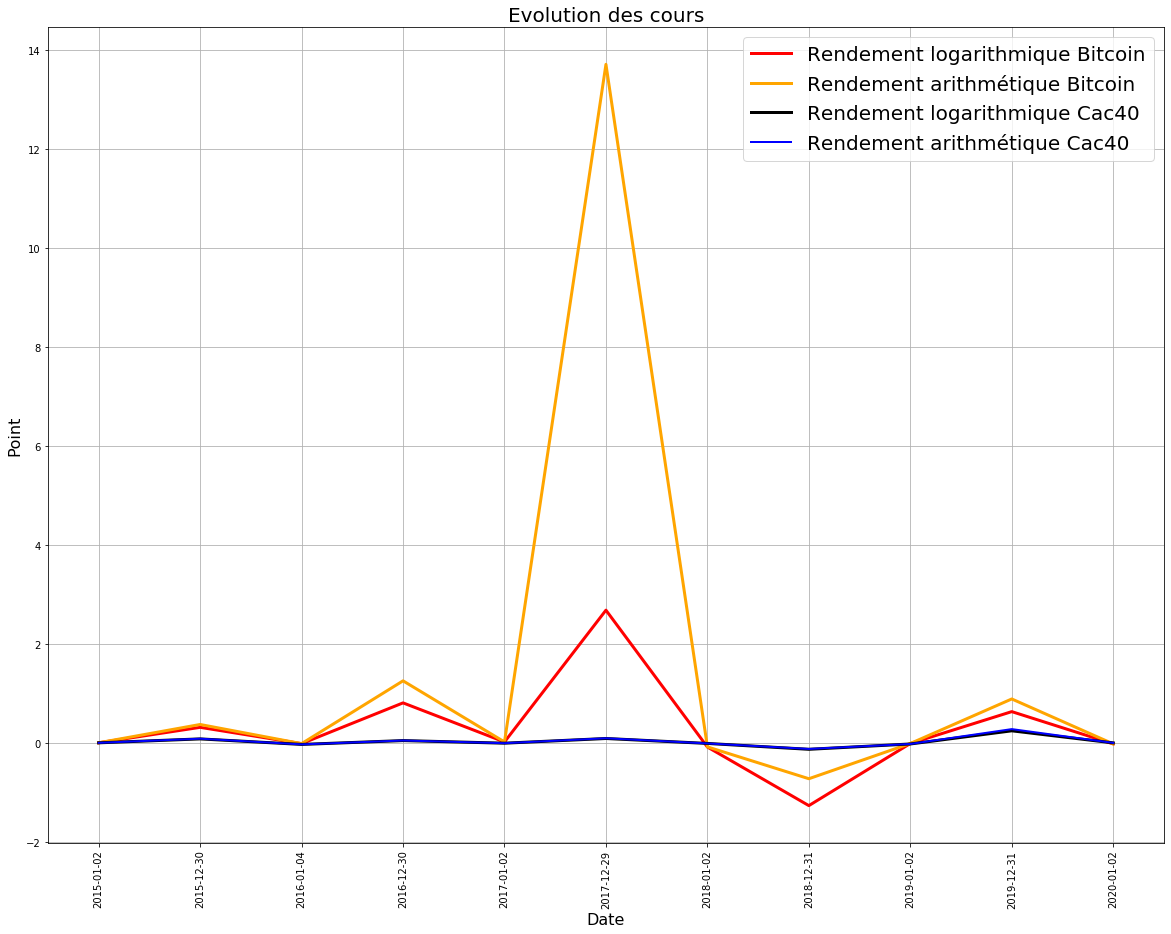

In [28]:
plt.figure(figsize=(20,15))

plt.plot(bitcoinAn['Date'][1:], listeRtBitcoinAn, color='red', linewidth=3, markersize=10, label = "Rendement logarithmique Bitcoin")
plt.plot(bitcoinAn['Date'][1:], listePtBitcoinAn, color='orange', linewidth=3, markersize=10, label = "Rendement arithmétique Bitcoin")
plt.plot(cac40An['Date'][1:], listeRtcac40An, color='black', linewidth=3, markersize=10, label = "Rendement logarithmique Cac40")
plt.plot(cac40An['Date'][1:], listePtAn, color='blue', linewidth=2, markersize=10, label = "Rendement arithmétique Cac40")

plt.xticks(rotation=90)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Point', fontsize=16)
plt.legend(fontsize=20)
plt.grid(True)
plt.title('Evolution des cours', fontsize=20)
plt.show()